<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

see practical1 folder

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

I. Download datasets (see Student ID in sheet 'Notes' here ) and put it into pandas Data Frame:

In [42]:
import statsmodels.api as sm
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from datetime import datetime, timedelta

%matplotlib inline

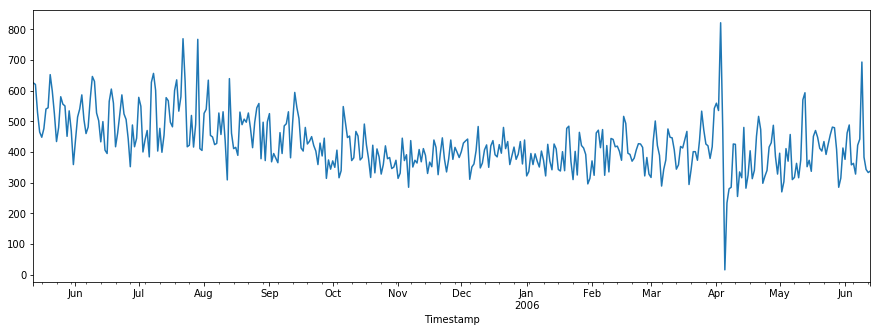

In [125]:
ts = pd.read_csv('TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts.sum(axis = 1).plot(figsize=(15,5))
ts36 = ts.sum(axis = 1)

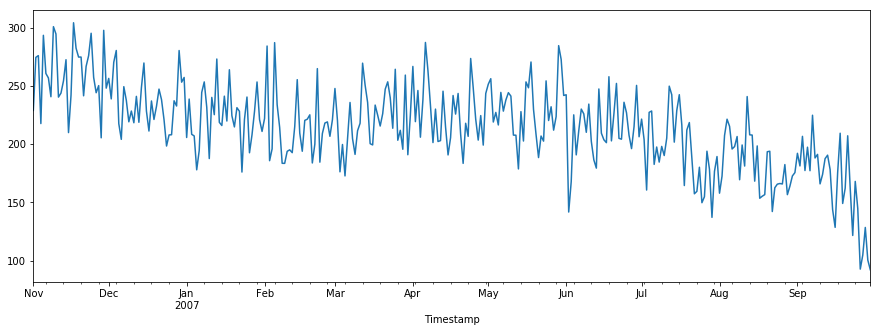

In [7]:
ts = pd.read_csv('TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts.sum(axis = 1).plot(figsize=(15,5))
ts6 = ts.sum(axis = 1)

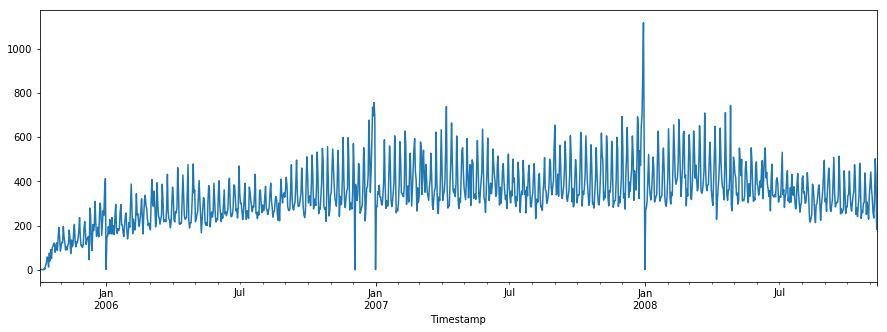

In [8]:
ts = pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts.sum(axis = 1).plot(figsize=(15,5))
ts42 = ts.sum(axis = 1)

II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)

In [126]:
ts36_train = ts36.loc[:'03.12.2006'] #75 percent
ts36_valid = ts36.loc[:'04.30.2006'] #90 percent
ts36_test = ts36.loc['04.30.2006':] #last 10

In [20]:
ts6_train = ts6.loc[:'07.01.2007']
ts6_valid = ts6.loc[:'09.01.2007']
ts6_test = ts6.loc['09.01.2007':]

In [29]:
ts42_train = ts42.loc[:'01.01.2008']
ts42_valid = ts42.loc[:'06.01.2008']
ts42_test = ts42.loc['06.01.2008':]

III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:

- 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
- 1) forecasting delay $h = 1$, loss function is MACAPE;

In [36]:
h=1
# loss function
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

In [37]:
# models
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [38]:
def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [39]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = l*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l_old)
            
        FORECAST[cntr+h] = l + s[(cntr+h)% p]
    return FORECAST

In [40]:
def WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    b = 0
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = (l+b)*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            b = beta * (l-l_old) + (1-beta) * b
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l)
            
        FORECAST[cntr+h] = l+ b + s[(cntr+h)% p]
    return FORECAST

- 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);

In [102]:
def find_params(ts, model, params):
    ALPHA = params
    FRC_TS = dict()
    ts1 = pd.DataFrame(ts)

    for alpha in ALPHA:
        frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                              , columns = ts.columns)
        for cntr in ts1.columns:
            frc_ts[cntr] = model(ts1[cntr], h, alpha)
        FRC_TS[str(alpha)] = frc_ts

    # compare ES parameters
    QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

    ix = range(len(ts1.index))

    for param_cntr in sorted(QualityStr.columns):
        frc_ts = FRC_TS[param_cntr]
        QualityStr[param_cntr],_ = qualityMACAPE(ts1.iloc[ix], frc_ts.iloc[ix])

    return (QualityStr.T)

# for winters

In [79]:
ALPHA =[{'alpha':0.1, 'delta': 0.2, 'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.3,'seasonality_period': 7},
        {'alpha':0.1, 'delta': 0.4, 'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.8, 'seasonality_period': 7},
        {'alpha':0.1, 'delta': 0.6, 'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.7, 'seasonality_period': 7},
        {'alpha':0.1, 'delta': 0.1, 'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.2,'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.3, 'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.3,'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.95, 'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.8, 'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.3, 'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.1, 'seasonality_period': 7},
        {'alpha':0.1, 'delta': 0.5,'seasonality_period': 7},
        {'alpha':0.3, 'delta': 0.9,'seasonality_period': 7},
        {'alpha':0.2, 'delta': 0.1,'seasonality_period': 7},
        {'alpha':0.4, 'delta': 0.9,'seasonality_period': 7}]
find_params(pd.DataFrame(ts36_train),WintersExponentialSmoothing, ALPHA)

                                                           0
{'delta': 0.6, 'alpha': 0.1, 'seasonality_perio...  0.153564
{'delta': 0.3, 'alpha': 0.3, 'seasonality_perio...  0.146696
{'delta': 0.3, 'alpha': 0.2, 'seasonality_perio...  0.141974
{'delta': 0.1, 'alpha': 0.2, 'seasonality_perio...  0.134798
{'delta': 0.1, 'alpha': 0.1, 'seasonality_perio...  0.134835
{'delta': 0.95, 'alpha': 0.2, 'seasonality_peri...  0.221249
{'delta': 0.9, 'alpha': 0.4, 'seasonality_perio...  0.260010
{'delta': 0.8, 'alpha': 0.2, 'seasonality_perio...  0.186007
{'delta': 0.9, 'alpha': 0.3, 'seasonality_perio...  0.238839
{'delta': 0.5, 'alpha': 0.1, 'seasonality_perio...  0.147931
{'delta': 0.4, 'alpha': 0.1, 'seasonality_perio...  0.143702
{'delta': 0.7, 'alpha': 0.2, 'seasonality_perio...  0.171667
{'delta': 0.1, 'alpha': 0.3, 'seasonality_perio...  0.136380
{'delta': 0.8, 'alpha': 0.3, 'seasonality_perio...  0.205828
{'delta': 0.2, 'alpha': 0.2, 'seasonality_perio...  0.137740
{'delta': 0.2, 'alpha': 

In [80]:
find_params(pd.DataFrame(ts6_train),WintersExponentialSmoothing, ALPHA)

                                                           0
{'delta': 0.6, 'alpha': 0.1, 'seasonality_perio...  0.111305
{'delta': 0.3, 'alpha': 0.3, 'seasonality_perio...  0.106869
{'delta': 0.3, 'alpha': 0.2, 'seasonality_perio...  0.103896
{'delta': 0.1, 'alpha': 0.2, 'seasonality_perio...  0.097105
{'delta': 0.1, 'alpha': 0.1, 'seasonality_perio...  0.095406
{'delta': 0.95, 'alpha': 0.2, 'seasonality_peri...  0.135651
{'delta': 0.9, 'alpha': 0.4, 'seasonality_perio...  0.144122
{'delta': 0.8, 'alpha': 0.2, 'seasonality_perio...  0.126989
{'delta': 0.9, 'alpha': 0.3, 'seasonality_perio...  0.136972
{'delta': 0.5, 'alpha': 0.1, 'seasonality_perio...  0.106763
{'delta': 0.4, 'alpha': 0.1, 'seasonality_perio...  0.102931
{'delta': 0.7, 'alpha': 0.2, 'seasonality_perio...  0.121600
{'delta': 0.1, 'alpha': 0.3, 'seasonality_perio...  0.098621
{'delta': 0.8, 'alpha': 0.3, 'seasonality_perio...  0.130641
{'delta': 0.2, 'alpha': 0.2, 'seasonality_perio...  0.100421
{'delta': 0.2, 'alpha': 

In [81]:
find_params(pd.DataFrame(ts42_train),WintersExponentialSmoothing, ALPHA)

                                                           0
{'delta': 0.6, 'alpha': 0.1, 'seasonality_perio...  0.167197
{'delta': 0.3, 'alpha': 0.3, 'seasonality_perio...  0.154142
{'delta': 0.3, 'alpha': 0.2, 'seasonality_perio...  0.153921
{'delta': 0.1, 'alpha': 0.2, 'seasonality_perio...  0.153785
{'delta': 0.1, 'alpha': 0.1, 'seasonality_perio...  0.157960
{'delta': 0.95, 'alpha': 0.2, 'seasonality_peri...  0.226712
{'delta': 0.9, 'alpha': 0.4, 'seasonality_perio...  0.363137
{'delta': 0.8, 'alpha': 0.2, 'seasonality_perio...  0.187211
{'delta': 0.9, 'alpha': 0.3, 'seasonality_perio...  0.244147
{'delta': 0.5, 'alpha': 0.1, 'seasonality_perio...  0.162849
{'delta': 0.4, 'alpha': 0.1, 'seasonality_perio...  0.159535
{'delta': 0.7, 'alpha': 0.2, 'seasonality_perio...  0.175443
{'delta': 0.1, 'alpha': 0.3, 'seasonality_perio...  0.153631
{'delta': 0.8, 'alpha': 0.3, 'seasonality_perio...  0.198916
{'delta': 0.2, 'alpha': 0.2, 'seasonality_perio...  0.151405
{'delta': 0.2, 'alpha': 

for winters model
in 36 alpha=0.2 delta=0.3
in 6 alpha=0.1 delta=0.2
in 42 alpha=0.2 delta=0.2

# for INIT

In [84]:
ALPHA =[{'alpha':0.1, 'AdaptationPeriod': 30},
        {'alpha':0.2, 'AdaptationPeriod': 30},
        {'alpha':0.3, 'AdaptationPeriod': 30},
        {'alpha':0.4, 'AdaptationPeriod': 30},
        {'alpha':0.5, 'AdaptationPeriod': 30},
        {'alpha':0.6, 'AdaptationPeriod': 30},
        {'alpha':0.7, 'AdaptationPeriod': 30},
        {'alpha':0.8, 'AdaptationPeriod': 30},
        {'alpha':0.9, 'AdaptationPeriod': 30},
        {'alpha':0.95, 'AdaptationPeriod': 30},
        {'alpha':0.05, 'AdaptationPeriod': 30}]
find_params(pd.DataFrame(ts36_train),InitExponentialSmoothing, ALPHA)

                                                0
{'AdaptationPeriod': 30, 'alpha': 0.2}   0.148558
{'AdaptationPeriod': 30, 'alpha': 0.4}   0.151496
{'AdaptationPeriod': 30, 'alpha': 0.7}   0.154695
{'AdaptationPeriod': 30, 'alpha': 0.05}  0.146360
{'AdaptationPeriod': 30, 'alpha': 0.9}   0.162511
{'AdaptationPeriod': 30, 'alpha': 0.3}   0.150620
{'AdaptationPeriod': 30, 'alpha': 0.95}  0.165517
{'AdaptationPeriod': 30, 'alpha': 0.1}   0.146227
{'AdaptationPeriod': 30, 'alpha': 0.5}   0.152172
{'AdaptationPeriod': 30, 'alpha': 0.6}   0.152273
{'AdaptationPeriod': 30, 'alpha': 0.8}   0.157879


In [85]:
find_params(pd.DataFrame(ts6_train),InitExponentialSmoothing, ALPHA)

                                                0
{'AdaptationPeriod': 30, 'alpha': 0.2}   0.095600
{'AdaptationPeriod': 30, 'alpha': 0.4}   0.099607
{'AdaptationPeriod': 30, 'alpha': 0.7}   0.106765
{'AdaptationPeriod': 30, 'alpha': 0.05}  0.095052
{'AdaptationPeriod': 30, 'alpha': 0.9}   0.113887
{'AdaptationPeriod': 30, 'alpha': 0.3}   0.097904
{'AdaptationPeriod': 30, 'alpha': 0.95}  0.115951
{'AdaptationPeriod': 30, 'alpha': 0.1}   0.093929
{'AdaptationPeriod': 30, 'alpha': 0.5}   0.101293
{'AdaptationPeriod': 30, 'alpha': 0.6}   0.103806
{'AdaptationPeriod': 30, 'alpha': 0.8}   0.110119


In [86]:
find_params(pd.DataFrame(ts42_train),InitExponentialSmoothing, ALPHA)

                                                0
{'AdaptationPeriod': 30, 'alpha': 0.2}   0.238911
{'AdaptationPeriod': 30, 'alpha': 0.4}   0.241671
{'AdaptationPeriod': 30, 'alpha': 0.7}   0.240549
{'AdaptationPeriod': 30, 'alpha': 0.05}  0.233963
{'AdaptationPeriod': 30, 'alpha': 0.9}   0.241842
{'AdaptationPeriod': 30, 'alpha': 0.3}   0.240806
{'AdaptationPeriod': 30, 'alpha': 0.95}  0.243227
{'AdaptationPeriod': 30, 'alpha': 0.1}   0.235976
{'AdaptationPeriod': 30, 'alpha': 0.5}   0.241406
{'AdaptationPeriod': 30, 'alpha': 0.6}   0.240747
{'AdaptationPeriod': 30, 'alpha': 0.8}   0.240559


for initES model
in 36 alpha=0.1
in 6 alpha=0.1
in 42 alpha=0.05

# for Adaptive

In [96]:
ALPHA =[{'alpha':0.1, 'gamma': 0.1, 'AdaptationPeriod':30},
        {'alpha':0.2, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.3, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.4, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.5, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.6, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.7, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.9, 'gamma': 0.5,'AdaptationPeriod':30},
        {'alpha':0.1, 'gamma': 0.9,'AdaptationPeriod':30},
        {'alpha':0.2, 'gamma': 0.9,'AdaptationPeriod':30},
        {'alpha':0.3, 'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.25,'gamma': 0.1,'AdaptationPeriod':30},
        {'alpha':0.5, 'gamma': 0.9,'AdaptationPeriod':30},]
find_params(pd.DataFrame(ts36_train),AdaptiveExponentialSmoothing, ALPHA)

                                                           0
{'AdaptationPeriod': 30, 'alpha': 0.7, 'gamma':...  0.142933
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.142950
{'AdaptationPeriod': 30, 'alpha': 0.9, 'gamma':...  0.153642
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.142953
{'AdaptationPeriod': 30, 'alpha': 0.25, 'gamma'...  0.142948
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.142940
{'AdaptationPeriod': 30, 'alpha': 0.3, 'gamma':...  0.142946
{'AdaptationPeriod': 30, 'alpha': 0.4, 'gamma':...  0.142943
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.164877
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.164889
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.164893
{'AdaptationPeriod': 30, 'alpha': 0.8, 'gamma':...  0.142930
{'AdaptationPeriod': 30, 'alpha': 0.6, 'gamma':...  0.142936


In [94]:
find_params(pd.DataFrame(ts6_train),AdaptiveExponentialSmoothing, ALPHA)

                                                           0
{'AdaptationPeriod': 30, 'alpha': 0.7, 'gamma':...  0.097683
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.097695
{'AdaptationPeriod': 30, 'alpha': 0.9, 'gamma':...  0.103810
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.097698
{'AdaptationPeriod': 30, 'alpha': 0.3, 'gamma':...  0.111845
{'AdaptationPeriod': 30, 'alpha': 0.25, 'gamma'...  0.111848
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.097688
{'AdaptationPeriod': 30, 'alpha': 0.3, 'gamma':...  0.097693
{'AdaptationPeriod': 30, 'alpha': 0.4, 'gamma':...  0.097690
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.111837
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.111850
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.111854
{'AdaptationPeriod': 30, 'alpha': 0.8, 'gamma':...  0.097680
{'AdaptationPeriod': 30, 'alpha': 0.6, 'gamma':...  0.097685


In [97]:
find_params(pd.DataFrame(ts42_train),AdaptiveExponentialSmoothing, ALPHA)

                                                           0
{'AdaptationPeriod': 30, 'alpha': 0.7, 'gamma':...  0.238735
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.238513
{'AdaptationPeriod': 30, 'alpha': 0.9, 'gamma':...  0.249621
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.238493
{'AdaptationPeriod': 30, 'alpha': 0.25, 'gamma'...  0.238523
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.238589
{'AdaptationPeriod': 30, 'alpha': 0.3, 'gamma':...  0.238533
{'AdaptationPeriod': 30, 'alpha': 0.4, 'gamma':...  0.238556
{'AdaptationPeriod': 30, 'alpha': 0.5, 'gamma':...  0.247672
{'AdaptationPeriod': 30, 'alpha': 0.2, 'gamma':...  0.247508
{'AdaptationPeriod': 30, 'alpha': 0.1, 'gamma':...  0.247456
{'AdaptationPeriod': 30, 'alpha': 0.8, 'gamma':...  0.238814
{'AdaptationPeriod': 30, 'alpha': 0.6, 'gamma':...  0.238658


for adaptiveES
for 36 alpha=0.8 gamma=0.1
for 6 alpha=0.8 gamma=0.1
for 42 alpha=0.25 gamma=0.1

# for wage model

In [112]:
ALPHA = [{'alpha':0.3, 'delta': 0.95, 'seasonality_period': 7, 'beta': 0.2},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 7, 'beta': 0.2},
        {'alpha':0.4, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.5, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.6, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.7, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.8, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.9, 'delta': 0.9, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.5, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.2, 'delta': 0.5, 'seasonality_period': 7, 'beta': 0.1},
        {'alpha':0.05, 'delta': 0.3, 'seasonality_period': 7, 'beta': 0.1}]
find_params(pd.DataFrame(ts36_train),WageExponentialSmoothing, ALPHA)

,0
"{'delta': 0.9, 'alpha': 0.8, 'seasonality_period': 7, 'beta': 0.1}",0.168235
"{'delta': 0.9, 'alpha': 0.6, 'seasonality_period': 7, 'beta': 0.1}",0.177513
"{'delta': 0.9, 'alpha': 0.7, 'seasonality_period': 7, 'beta': 0.1}",0.170368
"{'delta': 0.5, 'alpha': 0.2, 'seasonality_period': 7, 'beta': 0.1}",0.153481
"{'delta': 0.3, 'alpha': 0.05, 'seasonality_period': 7, 'beta': 0.1}",0.144157
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.1}",0.197806
"{'delta': 0.9, 'alpha': 0.5, 'seasonality_period': 7, 'beta': 0.1}",0.184930
"{'delta': 0.9, 'alpha': 0.9, 'seasonality_period': 7, 'beta': 0.1}",0.169151
"{'delta': 0.9, 'alpha': 0.4, 'seasonality_period': 7, 'beta': 0.1}",0.188125
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.2}",0.219779


In [113]:
find_params(pd.DataFrame(ts6_train),WageExponentialSmoothing, ALPHA)

,0
"{'delta': 0.9, 'alpha': 0.8, 'seasonality_period': 7, 'beta': 0.1}",0.125103
"{'delta': 0.9, 'alpha': 0.6, 'seasonality_period': 7, 'beta': 0.1}",0.130506
"{'delta': 0.9, 'alpha': 0.7, 'seasonality_period': 7, 'beta': 0.1}",0.127336
"{'delta': 0.5, 'alpha': 0.2, 'seasonality_period': 7, 'beta': 0.1}",0.111670
"{'delta': 0.3, 'alpha': 0.05, 'seasonality_period': 7, 'beta': 0.1}",0.100912
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.1}",0.129029
"{'delta': 0.9, 'alpha': 0.5, 'seasonality_period': 7, 'beta': 0.1}",0.128206
"{'delta': 0.9, 'alpha': 0.9, 'seasonality_period': 7, 'beta': 0.1}",0.123618
"{'delta': 0.9, 'alpha': 0.4, 'seasonality_period': 7, 'beta': 0.1}",0.126127
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.2}",0.135191


In [114]:
find_params(pd.DataFrame(ts42_train),WageExponentialSmoothing, ALPHA)

,0
"{'delta': 0.9, 'alpha': 0.8, 'seasonality_period': 7, 'beta': 0.1}",0.177912
"{'delta': 0.9, 'alpha': 0.6, 'seasonality_period': 7, 'beta': 0.1}",0.178443
"{'delta': 0.9, 'alpha': 0.7, 'seasonality_period': 7, 'beta': 0.1}",0.175951
"{'delta': 0.5, 'alpha': 0.2, 'seasonality_period': 7, 'beta': 0.1}",0.161601
"{'delta': 0.3, 'alpha': 0.05, 'seasonality_period': 7, 'beta': 0.1}",0.163125
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.1}",0.188144
"{'delta': 0.9, 'alpha': 0.5, 'seasonality_period': 7, 'beta': 0.1}",0.176050
"{'delta': 0.9, 'alpha': 0.9, 'seasonality_period': 7, 'beta': 0.1}",0.183165
"{'delta': 0.9, 'alpha': 0.4, 'seasonality_period': 7, 'beta': 0.1}",0.177617
"{'delta': 0.95, 'alpha': 0.3, 'seasonality_period': 7, 'beta': 0.2}",0.214014


for wage model
for 36 alpha=0.05 beta=0.1 delta=0.3
for 6 alpha=0.05 beta=0.1 delta=0.3
for 42 alpha=0.5 beta=0.1 delta=0.3

- 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
- 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!

In [116]:
def forecast(orig_ts, model, params):
    ts = orig_ts
    # Example: run forecast:
    h = 1
    rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

    w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
    #  Quality = [np.NaN]*len(ts)
    for cntr in ts.columns:
        w_frc_ts[cntr] = model(ts[cntr], h, params)
    return w_frc_ts

# for 36

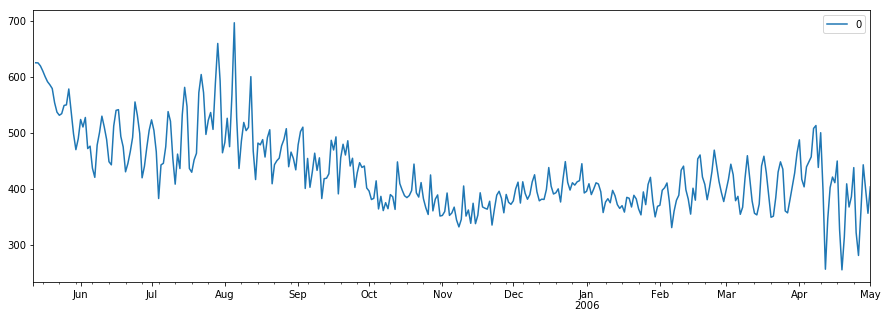

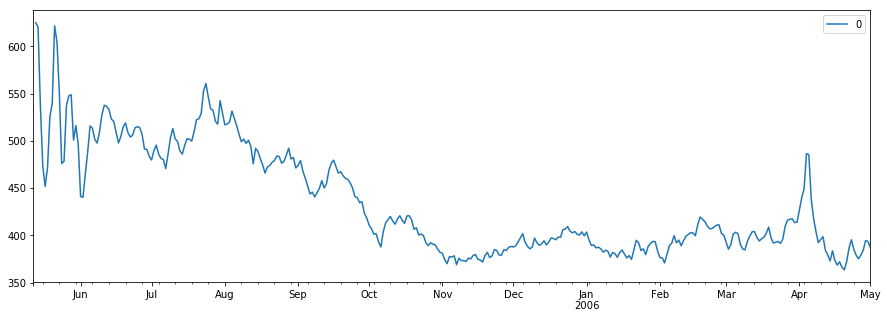

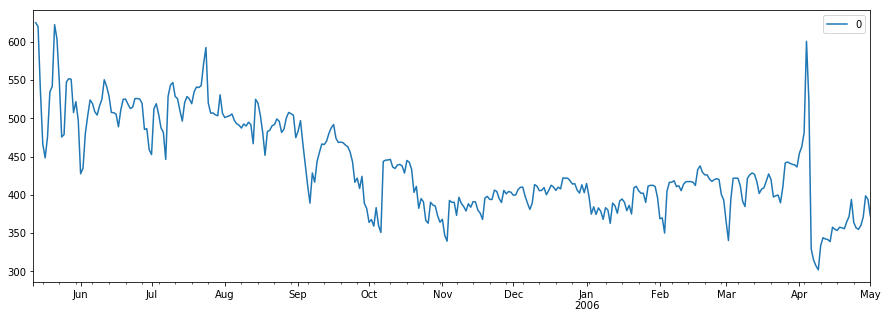

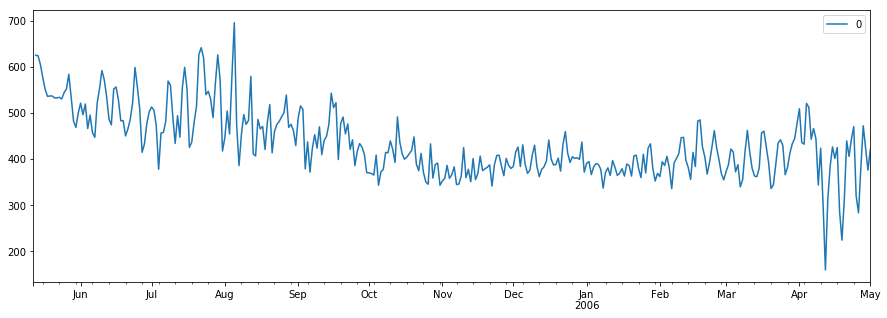

In [129]:
forecast(pd.DataFrame(ts36_valid),WageExponentialSmoothing,{'alpha':0.05, 'delta': 0.3, 'seasonality_period': 7, 'beta': 0.1}).plot(figsize=(15,5))
forecast(pd.DataFrame(ts36_valid),InitExponentialSmoothing,{'alpha':0.1, 'AdaptationPeriod': 30}).plot(figsize=(15,5))
forecast(pd.DataFrame(ts36_valid),AdaptiveExponentialSmoothing,{'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30}).plot(figsize=(15,5))
forecast(pd.DataFrame(ts36_valid),WintersExponentialSmoothing,{'alpha':0.2, 'delta': 0.3,'seasonality_period': 7}).plot(figsize=(15,5))

In [130]:
wage36 = forecast(pd.DataFrame(ts36_valid),WageExponentialSmoothing,{'alpha':0.05, 'delta': 0.3, 'seasonality_period': 7, 'beta': 0.1})
init36 = forecast(pd.DataFrame(ts36_valid),InitExponentialSmoothing,{'alpha':0.1, 'AdaptationPeriod': 30})
adapt36 = forecast(pd.DataFrame(ts36_valid),AdaptiveExponentialSmoothing,{'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30})
winter36 = forecast(pd.DataFrame(ts36_valid),WintersExponentialSmoothing,{'alpha':0.2, 'delta': 0.3,'seasonality_period': 7})

In [138]:
qualityMACAPE(pd.DataFrame(ts36_valid), wage36)[0]

0    0.135861
dtype: float64

In [139]:
qualityMACAPE(pd.DataFrame(ts36_valid), init36)[0]

0    0.132275
dtype: float64

In [140]:
qualityMACAPE(pd.DataFrame(ts36_valid), adapt36)[0]

0    0.130148
dtype: float64

In [141]:
qualityMACAPE(pd.DataFrame(ts36_valid), winter36)[0]

0    0.13507
dtype: float64

for 36 optimal is Adaptive with {'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30}

# for 6

In [142]:
wage6 = forecast(pd.DataFrame(ts6_valid),WageExponentialSmoothing,{'alpha':0.05, 'delta': 0.3, 'seasonality_period': 7, 'beta': 0.1})
init6 = forecast(pd.DataFrame(ts6_valid),InitExponentialSmoothing,{'alpha':0.1, 'AdaptationPeriod': 30})
adapt6 = forecast(pd.DataFrame(ts6_valid),AdaptiveExponentialSmoothing,{'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30})
winter6 = forecast(pd.DataFrame(ts6_valid),WintersExponentialSmoothing,{'alpha':0.1, 'delta': 0.,'seasonality_period': 7})

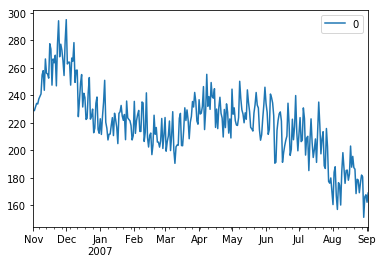

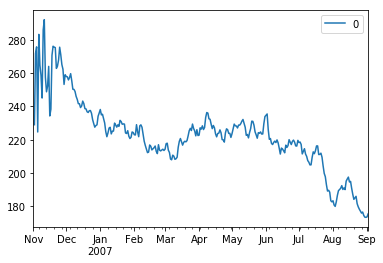

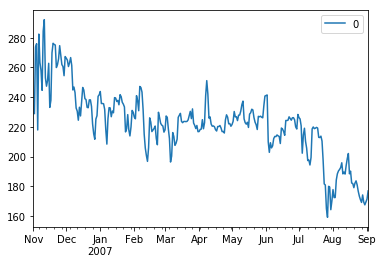

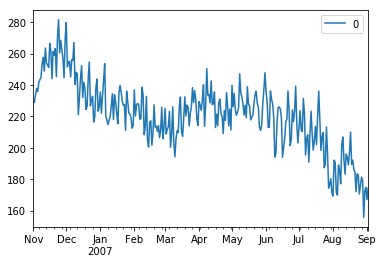

In [143]:
wage6.plot()
init6.plot()
adapt6.plot()
winter6.plot()

In [144]:
qualityMACAPE(pd.DataFrame(ts6_valid), wage6)[0]

0    0.104396
dtype: float64

In [145]:
qualityMACAPE(pd.DataFrame(ts6_valid), init6)[0]

0    0.097411
dtype: float64

In [146]:
qualityMACAPE(pd.DataFrame(ts6_valid), winter6)[0]

0    0.100735
dtype: float64

In [148]:
qualityMACAPE(pd.DataFrame(ts6_valid), adapt6)[0]

0    0.099564
dtype: float64

for 6 best is initES with {'alpha':0.1, 'AdaptationPeriod': 30}

# for 42

In [149]:
wage42 = forecast(pd.DataFrame(ts42_valid),WageExponentialSmoothing,{'alpha':0.5, 'delta': 0.3, 'seasonality_period': 7, 'beta': 0.1})
init42 = forecast(pd.DataFrame(ts42_valid),InitExponentialSmoothing,{'alpha':0.05, 'AdaptationPeriod': 30})
adapt42 = forecast(pd.DataFrame(ts42_valid),AdaptiveExponentialSmoothing,{'alpha':0.25, 'gamma': 0.1,'AdaptationPeriod':30})
winter42 = forecast(pd.DataFrame(ts42_valid),WintersExponentialSmoothing,{'alpha':0.2, 'delta': 0.2,'seasonality_period': 7})

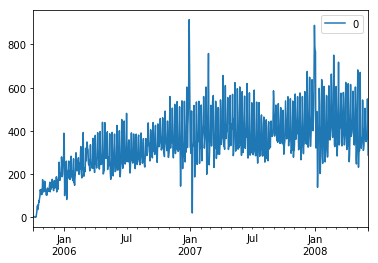

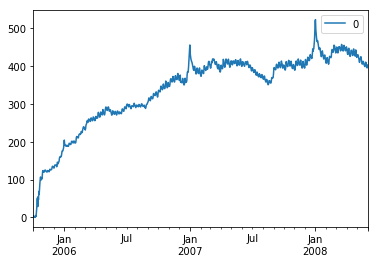

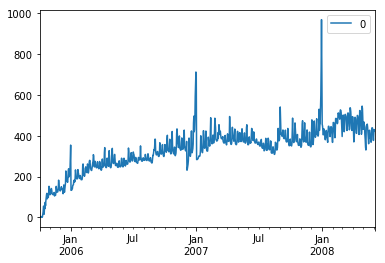

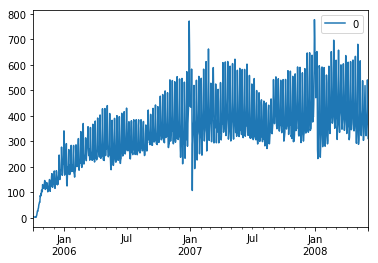

In [150]:
wage42.plot()
init42.plot()
adapt42.plot()
winter42.plot()

In [151]:
qualityMACAPE(pd.DataFrame(ts42_valid), wage42)[0]

0    0.158859
dtype: float64

In [152]:
qualityMACAPE(pd.DataFrame(ts42_valid), init42)[0]

0    0.230892
dtype: float64

In [154]:
qualityMACAPE(pd.DataFrame(ts42_valid), winter42)[0]

0    0.147829
dtype: float64

In [155]:
qualityMACAPE(pd.DataFrame(ts42_valid), adapt42)[0]

0    0.238298
dtype: float64

for 42 best is winters with {'alpha':0.2, 'delta': 0.2,'seasonality_period': 7}

 - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.

In [227]:
def histogram(ts,model,params):
    losses = []
    l = len(ts)
    for step in range(5,100,1):
        ts_part = pd.DataFrame(ts[:int(l*step/100)])
        for_my=forecast(ts_part,model,params)
        losses.append(((qualityMACAPE(ts_part,for_my)[0])[0]))
    return losses

In [228]:
loss_36 = histogram(ts36_valid,AdaptiveExponentialSmoothing, {'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30})

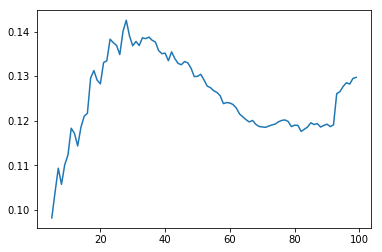

In [229]:
plt.plot(range(5,100,1),loss_36)

In [230]:
loss_6 = histogram(ts6_valid,InitExponentialSmoothing, {'alpha':0.1, 'AdaptationPeriod': 30})

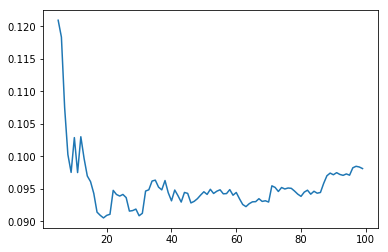

In [231]:
plt.plot(range(5,100,1),loss_6)

In [244]:
loss_42 = histogram(ts42_valid,WintersExponentialSmoothing, {'alpha':0.2, 'delta': 0.2,'seasonality_period': 7})

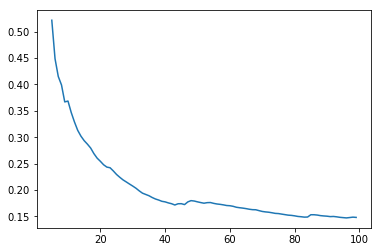

In [245]:
plt.plot(range(5,100,1),loss_42)

we see increasing end in each one of them, except 42

* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

for 36

In [235]:
qualityMACAPE(pd.DataFrame(ts36_test), forecast(pd.DataFrame(ts36_test),AdaptiveExponentialSmoothing, {'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30}))[0]

0    0.169623
dtype: float64

for 6

In [236]:
qualityMACAPE(pd.DataFrame(ts6_test), forecast(pd.DataFrame(ts6_test),InitExponentialSmoothing, {'alpha':0.1, 'AdaptationPeriod': 30}))[0]

0    0.163085
dtype: float64

for 42

In [237]:
qualityMACAPE(pd.DataFrame(ts42_test), forecast(pd.DataFrame(ts42_test),WintersExponentialSmoothing, {'alpha':0.2, 'delta': 0.2,'seasonality_period': 7}))[0]

0    0.109251
dtype: float64

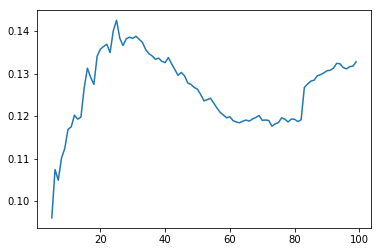

In [238]:
loss_36 = histogram(ts36,AdaptiveExponentialSmoothing, {'alpha':0.8, 'gamma': 0.1,'AdaptationPeriod':30})
plt.plot(range(5,100,1),loss_36)

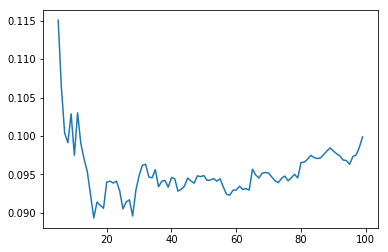

In [242]:
loss_6 = histogram(ts6,InitExponentialSmoothing, {'alpha':0.1, 'AdaptationPeriod': 30})
plt.plot(range(5,100,1),loss_6)

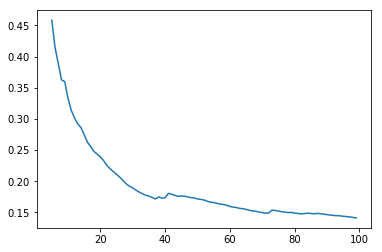

In [246]:
loss_42 = histogram(ts42,WintersExponentialSmoothing, {'alpha':0.2, 'delta': 0.2,'seasonality_period': 7})
plt.plot(range(5,100,1),loss_42)

they continue to increase, so it is because I optimized them in valid period, but 42 still has stabil loss